# `pystrat` Quickstart Guide

This Jupyter notebook is intended to quickly demonstrate core `pystrat` functionality. 

The example data files used in this guide can be found [here](https://github.com/pystrat-maintainers/pystrat/tree/main/docs/example-data).

## Installation

To install `pystrat`, use `pip`:
```bash
pip install pystrat
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pystrat

## Input Data

To plot sections with `pystrat`, it is necessary to provide a spreadsheet for each section in which the rows (downwards) correspond to units/beds going stratigraphically upwards, and there are minimally the following columns (see [example](example-data/lithostratigraphy.csv)):
- unit thickness (numeric)
- facies (string)

The facies column dictates how each unit will be visualized according to the styling.

The following code creates a `pystrat.Section`:

In [2]:
# read in your lithostratigraphy data
litho_df = pd.read_csv('example-data/lithostratigraphy.csv')

# create a pystrat Section from the lithostratigraphy data
section = pystrat.Section(litho_df['THICKNESS'],           # unit thicknesses
                          litho_df['FACIES'])              # unit facies

### Styling

Before plotting sections, it is necessary to define a `pystrat.Style` object. This object provides the styling information for widths, colors, and swatches for units within a section, as well as annotations that can be plotted alongside sections.

The styling logic is based on the unit facies, whereby each facies has a unique style specified in `pystrat.Style`. 

In [3]:
style_df = pd.read_csv('example-data/style.csv')
style_df.head()

,facies,R,G,B,width,swatch
0,cover,255,255,255,0.2,0
1,grainstone,248,169,85,0.8,627
2,intraclast breccia,200,100,255,1.0,605
3,marl,119,136,187,0.4,623
4,marl-ribbonite,119,136,187,0.4,623


A styling spreadsheet minimally contains the following columns (see [example](example-data/style.csv)):
- facies (string)
- color (must be interpretable to `matplotlib`)
- width (numeric)

In [4]:
style = pystrat.Style(style_df['facies'],                  # labels (must include all unique facies)
                         style_df[['R','G','B']]/255,         # colors 
                         style_df['width'],                   # widths 
                         swatch_values=style_df['swatch'])    # swatches

Styles can be easily visualized to generate legends.

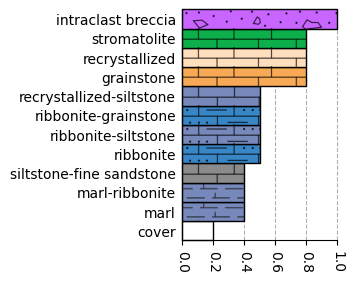

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(2, 3))
style.plot_legend(ax=ax)

## Single Section Plotting

With a style specified, the section defined above can be plotted.

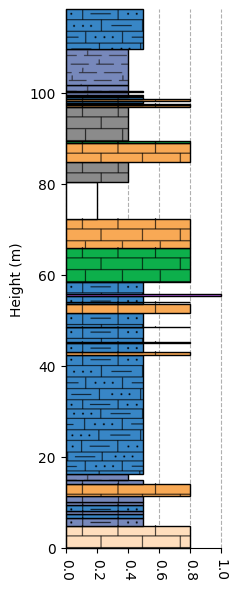

In [6]:
# plot the section using the style
fig = plt.figure(figsize=(2, 7))
# note that due to how swatches are plotted, it is preferrable to define an Axes object with a specified ylim to accommodate the section
ax = plt.axes(ylim=[0, section.total_thickness])   
section.plot(style, ax=ax)
plt.show()

:::{important} Note that above, a `matplotlib.pyplot.Axes` object was explicitly created, and its y-axis limits were set according to the overall stratigraphic thickness. It is strongly recommended to explicitly define axes when using swatches so that the swatches maintain their correct aspect ratios.

Sections can easily be saved as figures using the customary `matplotlib` `savefig` function:
```python
plt.savefig('<name_of_figure>.pdf', format='pdf', bbox_inches='tight', dpi=600)
```
If swatches appear to be low resolution in exported figures, simply increase their resolution by increasing the `dpi=` parameter.